In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt("./advertising.csv", delimiter= ",", skip_header= True)
N = data.shape[0]
print(N)
X = data[:, : -1]
y = data[:, -1]

200


In [3]:
def mean_normalization(X):
    N = len(X)
    maxi = np.max(X)
    mini = np.min(X)
    avg = np.mean(X)
    X = (X - avg) / (maxi - avg)
    X_b = np.c_[np.ones((N, 1)), X]
    return X_b, maxi, mini, avg

X_b, maxi, mini, avg = mean_normalization(X)
print(f"shape X_b: {X_b.shape}")
print(f"X_b: {X_b}")
print(f"maximum: {maxi}")
print(f"minimum: {mini}")
print(f"average: {avg}")

shape X_b: (200, 4)
X_b: [[ 1.00000000e+00  7.11043751e-01 -1.27060121e-01  9.79095345e-03]
 [ 1.00000000e+00 -9.78594139e-02 -1.20522649e-01 -9.52444252e-02]
 [ 1.00000000e+00 -2.16841399e-01 -9.17577736e-02  1.02267849e-02]
 [ 1.00000000e+00  3.68480234e-01 -1.11806020e-01 -3.68430113e-02]
 [ 1.00000000e+00  4.96178848e-01 -2.44734611e-01 -3.72788428e-02]
 [ 1.00000000e+00 -2.53887072e-01 -7.86828302e-02  3.50691773e-02]
 [ 1.00000000e+00 -4.12013258e-02 -1.48851693e-01 -1.89384018e-01]
 [ 1.00000000e+00  2.32064991e-01 -2.06381444e-01 -2.41247960e-01]
 [ 1.00000000e+00 -2.54322903e-01 -2.82651947e-01 -2.87446093e-01]
 [ 1.00000000e+00  5.78986823e-01 -2.80472790e-01 -1.99408141e-01]
 [ 1.00000000e+00 -3.71982140e-03 -2.66526184e-01 -1.86333197e-01]
 [ 1.00000000e+00  6.43925708e-01 -1.87204860e-01 -2.74371150e-01]
 [ 1.00000000e+00 -1.88076523e-01 -1.38827570e-01 -4.59148429e-03]
 [ 1.00000000e+00  1.33131253e-01 -2.58681218e-01 -2.60424543e-01]
 [ 1.00000000e+00  5.97727575e-01 -1.

In [32]:
def stochastic_gradient_descent(X_b, y, n_epochs= 50, learning_rate= 0.00001):
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
    
    thetas_path = [thetas.copy()]
    
    losses = []
    
    N = len(y)
    
    for epoch in range(n_epochs):
        for i in range(N):
            random_index = i
            
            x_i = X_b[random_index : random_index + 1]
            y_i = y[random_index : random_index + 1]
            
            # Calculate output
            y_hat = np.dot(x_i, thetas)
            
            # Calculate loss
            loss = (y_hat - y_i)**2 / 2
            losses.append(loss[0][0])
            
            # Calculate gradient for loss
            loss_gradients = y_hat - y_i
            
            # Compute gradient
            gradients = np.dot(x_i.T, loss_gradients) / 1

            # Update theta
            thetas = thetas - learning_rate * gradients
            thetas_path.append(thetas)
            
        # Logging
        print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {np.mean(losses):.4f}")
            
    return thetas_path, losses

Epoch 1/50, Loss: 30.8625
Epoch 2/50, Loss: 18.1959
Epoch 3/50, Loss: 13.5441
Epoch 4/50, Loss: 11.0533
Epoch 5/50, Loss: 9.4776
Epoch 6/50, Loss: 8.3847
Epoch 7/50, Loss: 7.5807
Epoch 8/50, Loss: 6.9643
Epoch 9/50, Loss: 6.4768
Epoch 10/50, Loss: 6.0815
Epoch 11/50, Loss: 5.7544
Epoch 12/50, Loss: 5.4792
Epoch 13/50, Loss: 5.2443
Epoch 14/50, Loss: 5.0413
Epoch 15/50, Loss: 4.8638
Epoch 16/50, Loss: 4.7073
Epoch 17/50, Loss: 4.5681
Epoch 18/50, Loss: 4.4433
Epoch 19/50, Loss: 4.3306
Epoch 20/50, Loss: 4.2284
Epoch 21/50, Loss: 4.1351
Epoch 22/50, Loss: 4.0496
Epoch 23/50, Loss: 3.9708
Epoch 24/50, Loss: 3.8978
Epoch 25/50, Loss: 3.8302
Epoch 26/50, Loss: 3.7671
Epoch 27/50, Loss: 3.7082
Epoch 28/50, Loss: 3.6529
Epoch 29/50, Loss: 3.6010
Epoch 30/50, Loss: 3.5521
Epoch 31/50, Loss: 3.5059
Epoch 32/50, Loss: 3.4622
Epoch 33/50, Loss: 3.4208
Epoch 34/50, Loss: 3.3814
Epoch 35/50, Loss: 3.3439
Epoch 36/50, Loss: 3.3082
Epoch 37/50, Loss: 3.2741
Epoch 38/50, Loss: 3.2415
Epoch 39/50, Loss

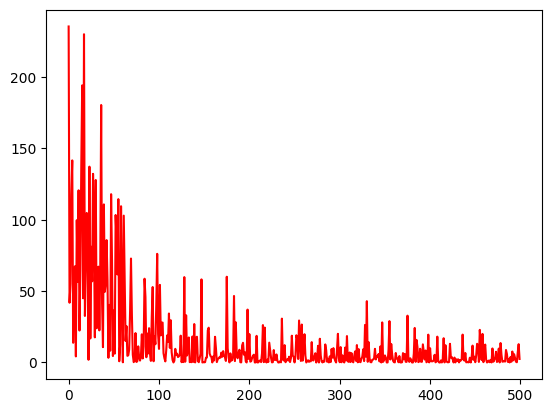

In [34]:
sgd_thetaa, losses = stochastic_gradient_descent(X_b, y, n_epochs= 50, learning_rate= 0.01)

x_axis = list(range(500))
plt.plot(x_axis, losses[: 500], color= "r")
plt.show()

In [6]:
def mini_batch_gradient_descent(X_b, y, n_epochs= 50, minibatch_size= 20, learning_rate= 0.00001):
    
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
    
    thetas_path = [thetas.copy()]
    losses = []
    N = len(y)
    
    for epoch in range(n_epochs):
        shuffled_indices = np . asarray ([21 , 144 , 17 , 107 , 37 , 115 , 167 , 31 , 3 , 132 , 179 , 155 , 36 , 191 , 182 , 170 , 27 , 35 , 162 , 25 , 28 , 73 , 172 , 152 , 102 , 16 ,
                                            185 , 11 , 1 , 34 , 177 , 29 , 96 , 22 , 76 , 196 , 6 , 128 , 114 , 117 , 111 , 43 , 57 , 126 , 
                                            165 , 78 , 151 , 104 , 110 , 53 , 181 , 113 , 173 , 75 , 23 , 161 , 85 , 94 , 18 , 148 , 190 , 
                                            169 , 149 , 79 , 138 , 20 , 108 , 137 , 93 , 192 , 198 , 153 , 4 , 45 , 164 , 26 , 8 , 131 , 
                                            77 , 80 , 130 , 127 , 125 , 61 , 10 , 175 , 143 , 87 , 33 , 50 , 54 , 97 , 9 , 84 , 188 , 139 , 
                                            195 , 72 , 64 , 194 , 44 , 109 , 112 , 60 , 86 , 90 , 140 , 171 , 59 , 199 , 105 , 41 , 147 , 
                                            92 , 52 , 124 , 71 , 197 , 163 , 98 , 189 , 103 , 51 , 39 , 180 , 74 , 145 , 118 , 38 , 47 , 
                                            174 , 100 , 184 , 183 , 160 , 69 , 91 , 82 , 42 , 89 , 81 , 186 , 136 , 63 , 157 , 46 , 67 , 
                                            129 , 120 , 116 , 32 , 19 , 187 , 70 , 141 , 146 , 15 , 58 , 119 , 12 , 95 , 0 , 40 , 83 , 24 , 
                                            168 , 150 , 178 , 49 , 159 , 7 , 193 , 48 , 30 , 14 , 121 , 5 , 142 , 65 , 176 , 101 , 55 , 
                                            133 , 13 , 106 , 66 , 99 , 68 , 135 , 158 , 88 , 62 , 166 , 156 , 2 , 134 , 56 , 123 , 122 , 154])
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        
        for i in range(0, N, minibatch_size):
            x_i = X_b_shuffled[i: i + minibatch_size]
            y_i = y_shuffled[i: i + minibatch_size]
            
            y_hat = np.dot(x_i, thetas)
            
            loss = (y_hat - y_i)**2 / 2
            
            loss_gradient = y_hat - y_i
            
            gradients  = np.dot(x_i.T, loss_gradient) / minibatch_size
            
            thetas = thetas - learning_rate * gradients
            thetas_path.append(thetas)
            
            loss_mean = np.sum(loss)/minibatch_size
            losses.append(loss_mean)
            
    return thetas_path, losses

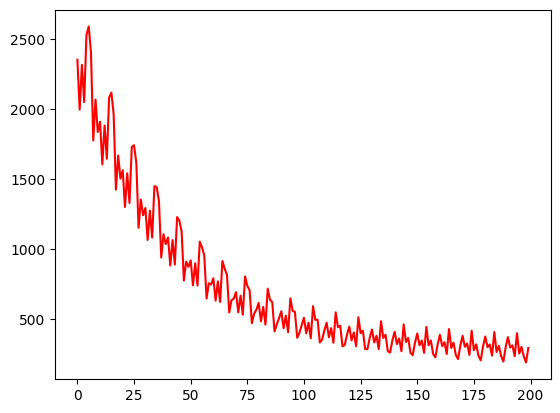

In [7]:
mggd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs= 50, minibatch_size= 20, learning_rate= 0.01)

x_axis = list(range(200))
plt.plot(x_axis, losses[:200], color= "r")
plt.show()

In [35]:
def batch_gradient_descent(X_b, y, n_epochs= 100, learning_rate= 0.01):
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
    
    thetas_path = [thetas]
    losses = []
    
    for i in range(n_epochs):
        
        y_hat = np.dot(X_b, thetas)
        
        loss = (y_hat - y)**2 / 2
        
        loss_gradients = y_hat - y
        
        gradients = np.dot(X_b.T, loss_gradients) / N
        
        thetas = thetas - learning_rate * gradients
        thetas_path.append(thetas)
        
        mean_loss = np.sum(loss) / N
        losses.append(mean_loss)
        
    return thetas_path, losses

929813.62


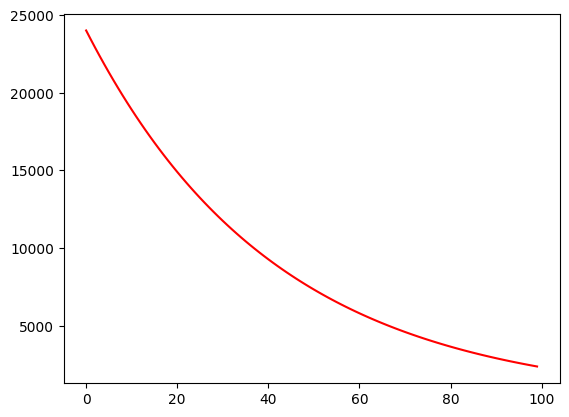

In [37]:
bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs= 100, learning_rate= 0.01)

print(round(sum(losses), 2))

x_axis = list(range(100))
plt.plot(x_axis, losses[:100], color= "r")
plt.show()